In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans,MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.preprocessing import normalize
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
# 2014
df = pd.read_csv('/Users/admin/Documents/Thinkful_Projects/results.csv', error_bad_lines=False)

In [3]:
df.shape

(31984, 21)

In [4]:
pd.set_option('display.max_columns', 21)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [6]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [7]:
df['state'].isnull().sum()

2576

In [8]:
#creating a binary row capturing wheelchair participants

def remove(row):
    if row['bib'].count('W') >0:
        return 1
    else:
        return 0

df['wheelchair'] = df.apply(remove, axis=1)

In [9]:
np.unique(df['wheelchair'])

array([0, 1])

In [10]:
# encode women as '1'
df['gender'] = np.where(df['gender']=='F', 1,0)

In [11]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,pace,state,30k,5k,half,20k,country,city,40k,wheelchair
0,17.37,"Yamamoto, Hiroyuki",8,47.67,0,47,85.25,W1,8,NaN,...,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,1
1,32.58,"Jeptoo, Rita",1,82.43,1,33,138.95,F1,1,NaN,...,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,0
2,16.62,"Van Dyk, Ernst F.",1,45.80,0,41,80.60,W2,1,NaN,...,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,1
3,32.57,"Dibaba, Mare",3,82.43,1,24,140.58,F2,3,NaN,...,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,0
4,17.12,"Hokinoue, Kota",2,46.37,0,40,81.23,W3,2,NaN,...,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,1


In [12]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
df['10k'] = pd.to_numeric(df['10k'], errors = 'coerce')
df['division'] = pd.to_numeric(df['division'], errors = 'coerce')
df['25k'] = pd.to_numeric(df['25k'], errors = 'coerce')
df['official'] = pd.to_numeric(df['official'], errors = 'coerce')
df['genderdiv'] = pd.to_numeric(df['genderdiv'], errors = 'coerce')
df['35k'] = pd.to_numeric(df['35k'], errors = 'coerce')
df['10k'] = pd.to_numeric(df['10k'], errors = 'coerce')
df['30k'] = pd.to_numeric(df['30k'], errors = 'coerce')
df['5k'] = pd.to_numeric(df['5k'], errors = 'coerce')
df['half'] = pd.to_numeric(df['half'], errors = 'coerce')
df['20k'] = pd.to_numeric(df['20k'], errors = 'coerce')
df['40k'] = pd.to_numeric(df['40k'], errors = 'coerce')

In [14]:
df.dtypes

10k           float64
name           object
division        int64
25k           float64
gender          int64
age             int64
official      float64
bib            object
genderdiv       int64
ctz            object
35k           float64
overall         int64
pace          float64
state          object
30k           float64
5k            float64
half          float64
20k           float64
country        object
city           object
40k           float64
wheelchair      int64
dtype: object

In [15]:
numerical =df[['10k',
    'division', 
    '25k', 
    'age',
    'official',
    'genderdiv', 
    '35k', 
    'overall',
    'pace',
    '30k', 
    '5k',
    'half', 
    '20k',  
    '40k']]


In [16]:
numerical = numerical.fillna(numerical.mean())

In [17]:
numerical_normalized = normalize(numerical)

In [18]:
numerical_normalized_df = pd.DataFrame(numerical_normalized, columns = numerical.columns)

In [19]:
numerical_normalized_df.shape

(31984, 14)

In [20]:
df_concat = pd.concat([numerical_normalized_df, df['gender'], df['wheelchair']], axis=1, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,copy=True)

In [21]:
df_concat.head(20)

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender,wheelchair
0,0.099653,0.045897,0.273487,0.269643,0.489086,0.045897,0.409627,0.045897,0.018760,0.339520,0.046011,0.227877,0.216001,0.461433,0,1
1,0.115911,0.003558,0.293264,0.117405,0.494346,0.003558,0.414013,0.074712,0.018856,0.353389,0.057706,0.247155,0.234205,0.469976,1,0
2,0.101340,0.006098,0.279266,0.249998,0.491459,0.006098,0.411093,0.006098,0.018780,0.344204,0.047256,0.231888,0.220120,0.464020,0,1
3,0.115531,0.010641,0.292393,0.085132,0.498660,0.010641,0.412783,0.095773,0.019048,0.352340,0.057464,0.246421,0.233510,0.471595,1,0
4,0.103625,0.012106,0.280670,0.242114,0.491673,0.012106,0.410564,0.012106,0.018764,0.345194,0.048544,0.233640,0.221413,0.464374,0,1
5,0.115301,0.014156,0.291791,0.102631,0.497868,0.014156,0.411834,0.099092,0.019004,0.351530,0.057403,0.245855,0.232973,0.470511,1,0
6,0.104740,0.023737,0.282887,0.166160,0.502337,0.023737,0.416764,0.023737,0.019168,0.347749,0.049729,0.235709,0.223426,0.473733,0,1
7,0.116826,0.019164,0.294940,0.111153,0.497622,0.019164,0.411919,0.019164,0.019049,0.354618,0.058145,0.248562,0.236182,0.470677,0,0
8,0.103131,0.018072,0.279333,0.259032,0.489329,0.018072,0.408608,0.018072,0.018674,0.343548,0.048192,0.232526,0.220478,0.462040,0,1
9,0.111376,0.073081,0.283848,0.113276,0.503640,0.073081,0.410242,0.073081,0.019257,0.346333,0.055359,0.238355,0.225748,0.474408,0,0


In [22]:
df_concat.dtypes

10k           float64
division      float64
25k           float64
age           float64
official      float64
genderdiv     float64
35k           float64
overall       float64
pace          float64
30k           float64
5k            float64
half          float64
20k           float64
40k           float64
gender          int64
wheelchair      int64
dtype: object

In [23]:
pca = PCA(n_components=2)
df_concat_pca = pca.fit_transform(df_concat)

In [24]:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    df_concat,
    df_concat_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Mean Shift

In [25]:
n_clusters = []
for sample in [X1, X2, X3, X4]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs = -1).fit(sample)
    labels = model.labels_
    n_clusters_ = len(np.unique(labels))
    n_clusters.append(n_clusters_)
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.7361448666971003
0.7368740942302812
0.7350203290692406
0.7326757726645842


In [26]:
# the number of clusters stays consistent
n_clusters

[5, 6, 7, 5]

In [27]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=number, 
                        random_state=42, 
                        batch_size=200).fit(X1)
    labels = minibatchkmeans.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X1, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8163252085922451
Estimated number of clusters: 3
0.7396828531263254
Estimated number of clusters: 5
0.5621637245477953
Estimated number of clusters: 7
0.5609382915995623
Estimated number of clusters: 8
0.5509048720784234


In [28]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=number, 
                        random_state=42, 
                        batch_size=200).fit(X2)
    labels = minibatchkmeans.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X2, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8153309509505956
Estimated number of clusters: 3
0.7411592126577566
Estimated number of clusters: 5
0.5484894148830073
Estimated number of clusters: 7
0.5569053517381527
Estimated number of clusters: 8
0.5160872328852645


In [29]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=number, 
                        random_state=42, 
                        batch_size=200).fit(X3)
    labels = minibatchkmeans.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X3, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8157272093792844
Estimated number of clusters: 3
0.7401112147531731
Estimated number of clusters: 5
0.5637817654540003
Estimated number of clusters: 7
0.4938964667356427
Estimated number of clusters: 8
0.5302459424242177


In [30]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=number, 
                        random_state=42, 
                        batch_size=200).fit(X4)
    labels = minibatchkmeans.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X4, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8169946563821632
Estimated number of clusters: 3
0.7424771105997154
Estimated number of clusters: 5
0.6708877911003399
Estimated number of clusters: 7
0.502075626582156
Estimated number of clusters: 8
0.5125302474018786


`MiniBatchKmeans stays stable with 2 and 3 clusters.`

# Spectral Clustering

In [31]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    sc = SpectralClustering(n_clusters=number, n_jobs = -1)
    sc.fit(X1)
    labels = sc.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X1, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8163252085922451
Estimated number of clusters: 3
0.8209403817393217
Estimated number of clusters: 5
0.7396667686235134
Estimated number of clusters: 7
0.5825479635388562
Estimated number of clusters: 8
0.576439864701409


In [32]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    sc = SpectralClustering(n_clusters=number, n_jobs = -1)
    sc.fit(X2)
    labels = sc.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X2, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8153309509505956
Estimated number of clusters: 3
0.8184108568889351
Estimated number of clusters: 5
0.7396492437450859
Estimated number of clusters: 7
0.505723990692689
Estimated number of clusters: 8
0.5488318103099865


In [33]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    sc = SpectralClustering(n_clusters=number, n_jobs = -1)
    sc.fit(X3)
    labels = sc.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X3, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8157272093792844
Estimated number of clusters: 3
0.7418781193094346
Estimated number of clusters: 5
0.7390038016983881
Estimated number of clusters: 7
0.5000688615509609
Estimated number of clusters: 8
0.5670957803808215


In [34]:
clusters = [2, 3, 5, 7, 8]
for number in clusters:
    sc = SpectralClustering(n_clusters=number, n_jobs = -1)
    sc.fit(X4)
    labels = sc.labels_
    print('Estimated number of clusters: {}'.format(number))
    print(metrics.silhouette_score(X4, labels, metric='euclidean'))

Estimated number of clusters: 2
0.8169946563821632
Estimated number of clusters: 3
0.7446713422149196
Estimated number of clusters: 5
0.736879457989109
Estimated number of clusters: 7
0.5020000195910815
Estimated number of clusters: 8
0.5440519338768293


`Spectral clustering stays stable with 2 and 5 clusters.`

In [35]:
sc = SpectralClustering(n_clusters=2, n_jobs = -1)
sc.fit(X1)
sc_labels = sc.labels_

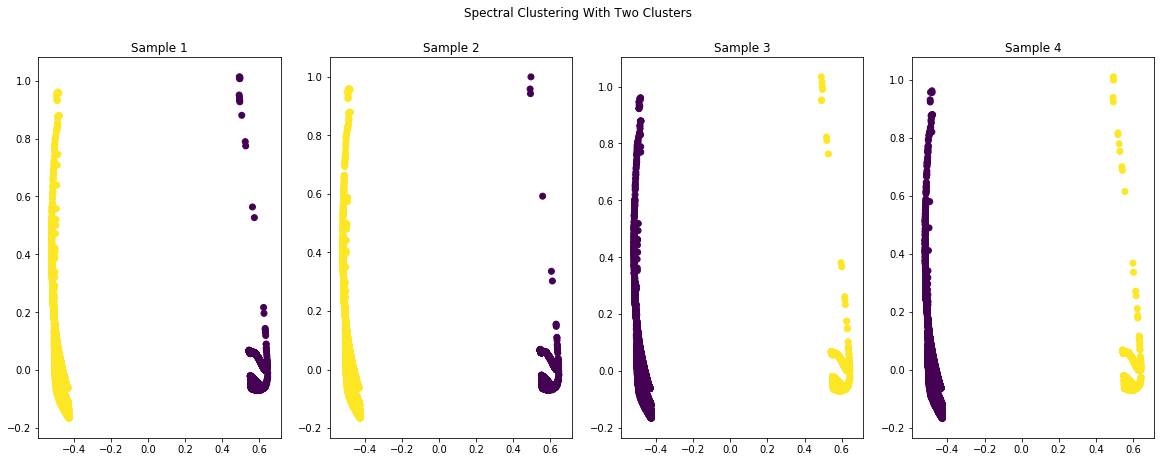

In [36]:
plt.figure(figsize=(20,7))

plt.subplot(141)
sc = SpectralClustering(n_clusters=2, n_jobs = -1)
sc.fit(X1)
sc_labels = sc.labels_
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=sc_labels)
plt.title('Sample 1')

plt.subplot(142)
sc.fit(X2)
sc_2labels = sc.labels_
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=sc_2labels)
plt.title('Sample 2')

plt.subplot(143)
sc.fit(X3)
sc_3labels = sc.labels_
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=sc_3labels)
plt.title('Spectral Clustering With Two Clusters')
plt.title('Sample 3')

plt.subplot(144)
sc.fit(X4)
sc_4labels = sc.labels_
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=sc_4labels)
plt.title('Sample 4')

plt.suptitle('Spectral Clustering With Two Clusters')
plt.show()

In [37]:
minibatchkmeans = MiniBatchKMeans(init='k-means++',
                        n_clusters=2, 
                        random_state=42, 
                        batch_size=200)

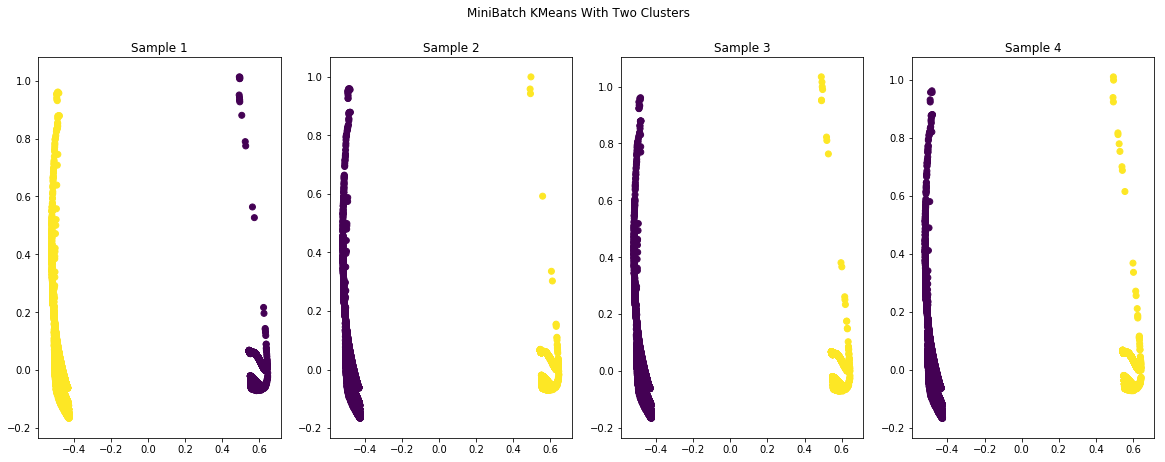

In [38]:
plt.figure(figsize=(20,7))

plt.subplot(141)

minibatchkmeans.fit(X1)
mini_labels = minibatchkmeans.labels_
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=mini_labels)
plt.title('Sample 1')

plt.subplot(142)
minibatchkmeans.fit(X2)
mini_2labels = minibatchkmeans.labels_
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=mini_2labels)
plt.title('Sample 2')

plt.subplot(143)
minibatchkmeans.fit(X3)
mini_3labels = minibatchkmeans.labels_
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=mini_3labels)
plt.title('Sample 3')

plt.subplot(144)
minibatchkmeans.fit(X4)
mini_4labels = minibatchkmeans.labels_
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=mini_4labels)
plt.title('Sample 4')

plt.suptitle('MiniBatch KMeans With Two Clusters')
plt.show()

# Centroids Location

First cluster is comprised of participants who are more likely to be older, female or in a wheelchair. They overall took almost twice as much time to reach each milestone. The second cluster is comprised of people who are more likely to be younger, male,and less likely to be disabled. They are twice as fast on average.

In [44]:
pd.DataFrame(minibatchkmeans.cluster_centers_, columns = df_concat.columns)

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender,wheelchair
0,0.007579,0.145730,0.019266,0.007364,0.033959,0.557505,0.027747,0.783672,0.001297,0.023434,0.003780,0.016178,0.015333,0.032041,0.0,0.003292
1,0.003783,0.099632,0.009681,0.002948,0.017181,0.321069,0.014050,0.931911,0.000656,0.011830,0.001883,0.008110,0.007682,0.016230,1.0,0.000781


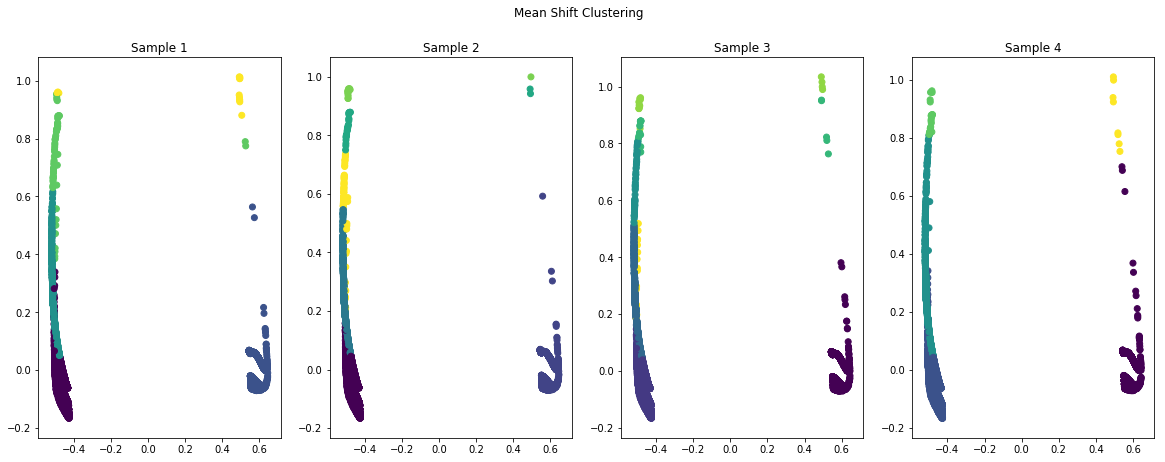

In [39]:
plt.figure(figsize=(20,7))

plt.subplot(141)
bandwidth = estimate_bandwidth(X1, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs = -1).fit(X1)
ms_labels = ms.labels_
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=ms_labels)
plt.title('Sample 1')

plt.subplot(142)
bandwidth = estimate_bandwidth(X2, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs = -1).fit(X2)
ms1_labels = ms.labels_
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=ms1_labels)
plt.title('Sample 2')

plt.subplot(143)
bandwidth = estimate_bandwidth(X3, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs = -1).fit(X3)
ms2_labels = ms.labels_
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=ms2_labels)
plt.title('Sample 3')

plt.subplot(144)
bandwidth = estimate_bandwidth(X4, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs = -1).fit(X4)
ms3_labels = ms.labels_
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=ms3_labels)
plt.title('Sample 4')

plt.suptitle('Mean Shift Clustering')
plt.show()

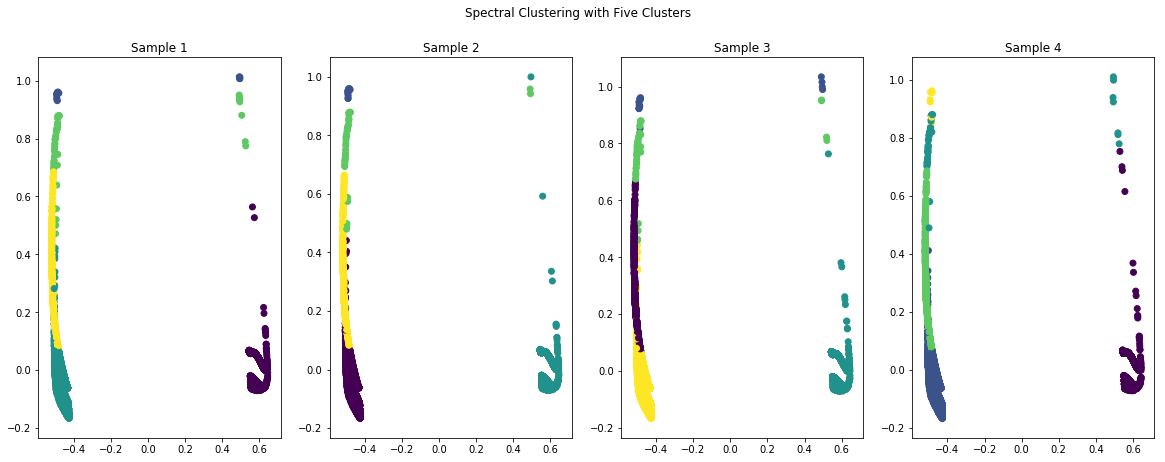

In [40]:
plt.figure(figsize=(20,7))

plt.subplot(141)
sc = SpectralClustering(n_clusters=5, n_jobs = -1)
sc.fit(X1)
sc_labels = sc.labels_
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=sc_labels)
plt.title('Sample 1')

plt.subplot(142)
sc = SpectralClustering(n_clusters=5, n_jobs = -1)
sc.fit(X2)
sc1_labels = sc.labels_
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=sc1_labels)
plt.title('Sample 2')

plt.subplot(143)
sc = SpectralClustering(n_clusters=5, n_jobs = -1)
sc.fit(X3)
sc2_labels = sc.labels_
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=sc2_labels)
plt.title('Sample 3')

plt.subplot(144)
sc = SpectralClustering(n_clusters=5, n_jobs = -1)
sc.fit(X4)
sc3_labels = sc.labels_
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=sc3_labels)
plt.title('Sample 4')

plt.suptitle('Spectral Clustering with Five Clusters')
plt.show()

# Further Examination of The Clusters

In [48]:
sc = SpectralClustering(n_clusters=5, n_jobs = -1)
sc.fit(X1)
X1['labels'] = sc.labels_

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
# we have five unique clusters
np.unique(X1['labels'])

array([0, 1, 2, 3, 4], dtype=int32)

In [53]:
# include all the datapoints from '0' cluster out of thethe first sample
zero = X1[X1['labels']==0]

Group zero cluster includes younger men who are not disabled and who were very fast.

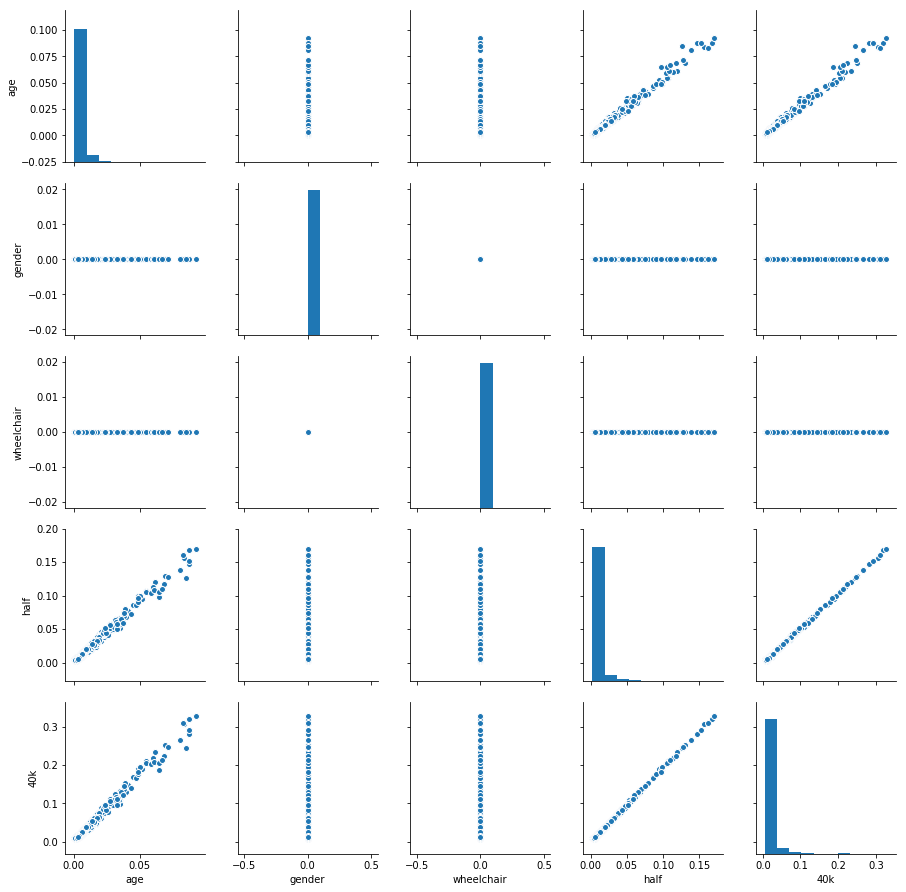

In [55]:
g = sns.pairplot(zero[['age','gender', 'wheelchair', 'half', '40k']])

In [56]:
one = X1[X1['labels']==1]

Group one includes men and women in a wheelchair who varied in age and tended to have slower finishing results.

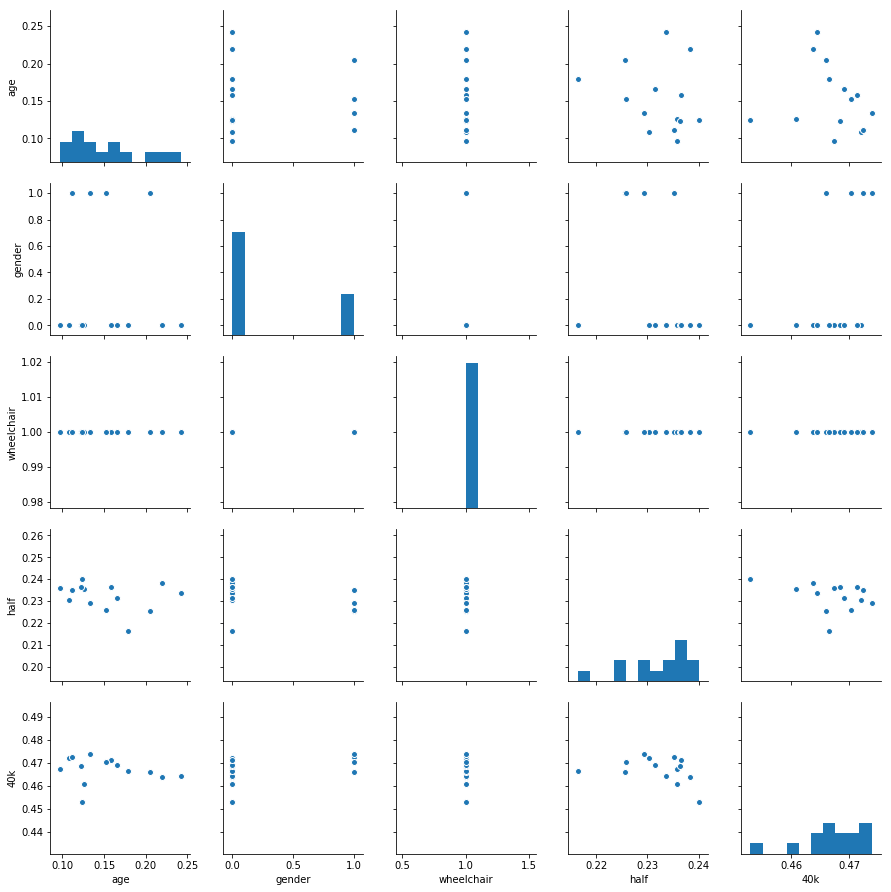

In [57]:
g = sns.pairplot(one[['age','gender', 'wheelchair', 'half', '40k']])

In [58]:
two = X1[X1['labels']==2]

Group two included younger women who were not in a wheel chair and who ran fast.

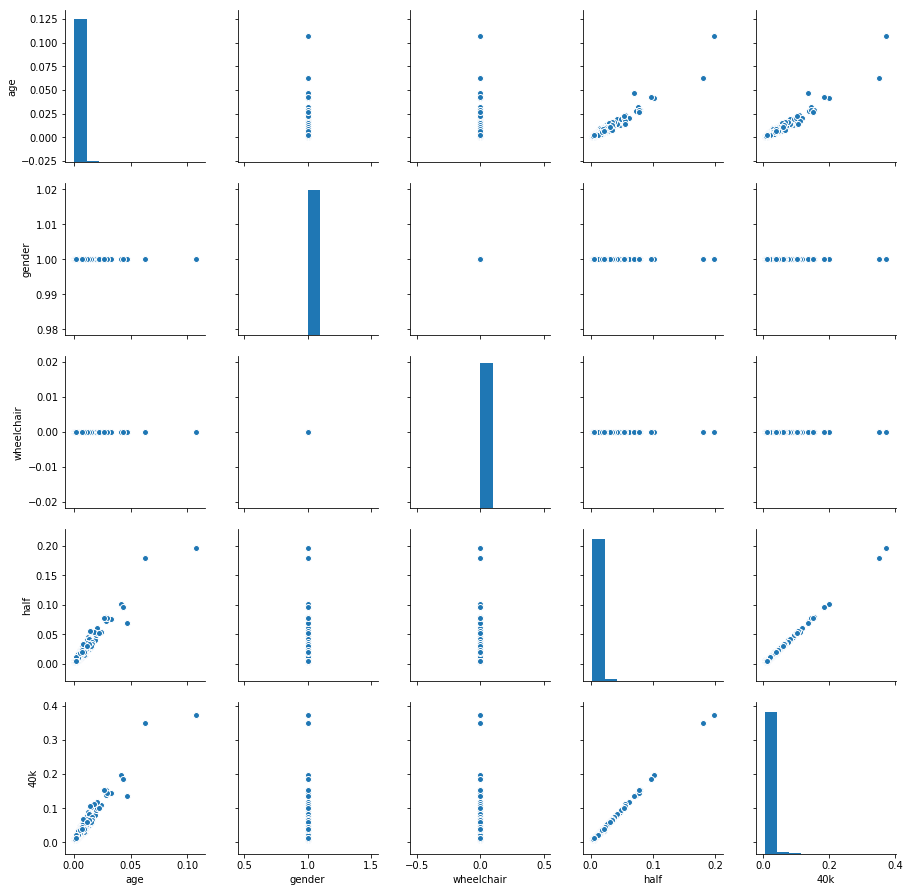

In [59]:
g = sns.pairplot(two[['age','gender', 'wheelchair', 'half', '40k']])

In [60]:
three = X1[X1['labels']==3]

Group three had mainly men (and some women) of various age groups who were not in a wheelchair and who tended to be slower.

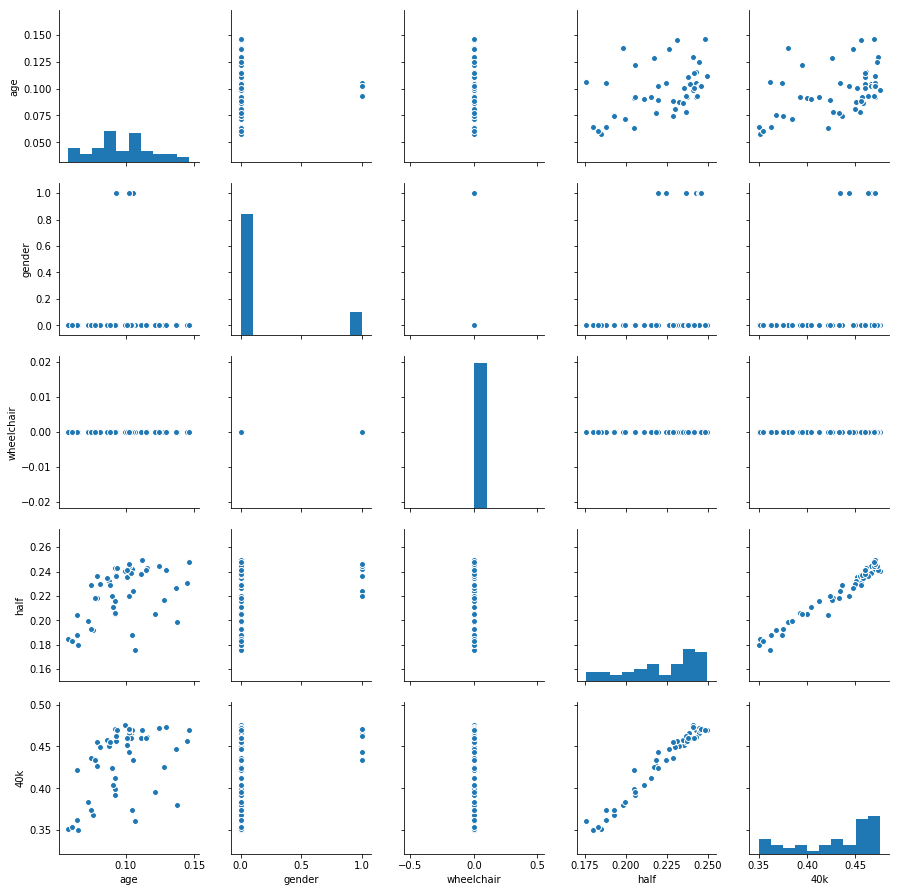

In [62]:
g = sns.pairplot(three[['age','gender', 'wheelchair', 'half', '40k']])

In [63]:
four = X1[X1['labels']==4]

The fourth group is comprised of non-disabled men who were not as young as members of group zero and who were fast but not as fast as members of group zero or group two (young non-disabled women).

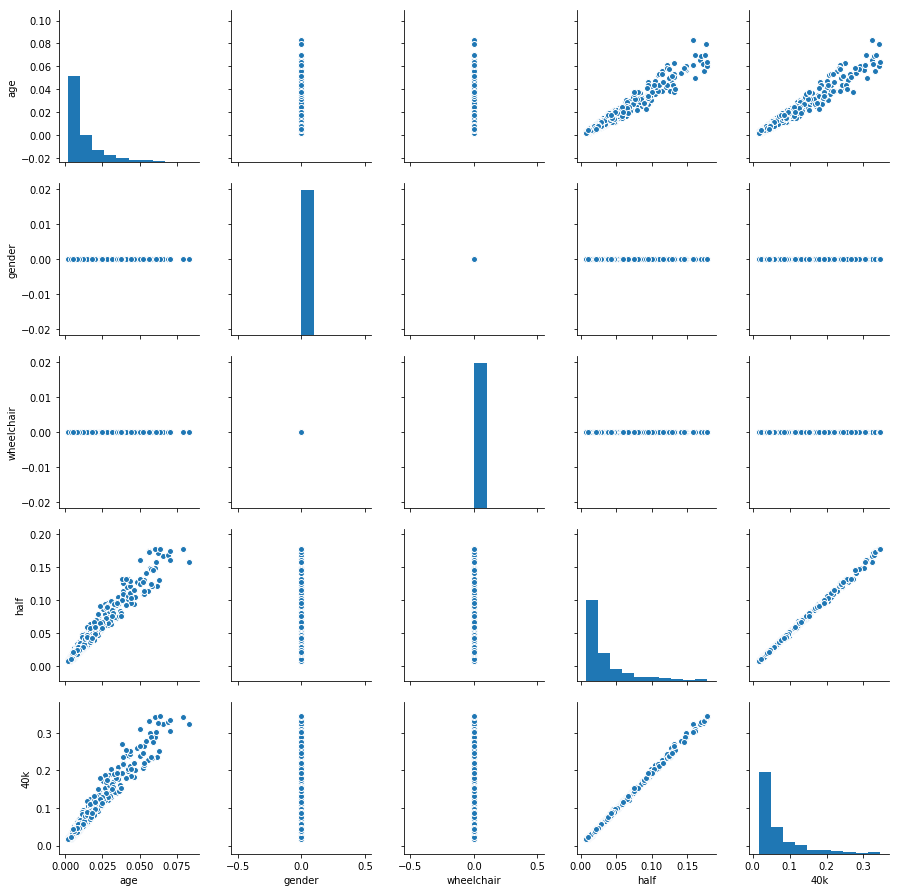

In [64]:
g = sns.pairplot(four[['age','gender', 'wheelchair', 'half', '40k']])

# Summary

Clustering algorithms give two stable solutions for the marathon data.

`Two cluster solution divides the data into two groups (MiniBatch K-Means):` 

- Participants who are more likely to be older, female or in a wheelchair. They overall took almost twice as much time to reach each milestone. 
- People who are more likely to be younger, male,and less likely to be disabled. They are twice as fast on average.

`Five cluster solution provides the following sub-divisions (Spectral Clustering):`
- Younger men who are not disabled and who were very fast.
- Men and women in a wheelchair who varied in age and tended to have slower finishing results.
- Group two included younger women who were not in a wheel chair and who ran fast.
- Group three had mainly men (and some women) of various age groups who were not in a wheelchair and who tended to be slower.
- Non-disabled men who were not as young as members of group zero and who were fast but not as fast as members of group zero or group two (young non-disabled women).